In [1]:
# Import der notwendigen Bibliotheken
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
import numpy as np
import shap

In [3]:
# Laden des Datensatzes
df_dsc = pd.read_csv("data/00_dsc.csv")
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...
269,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.05,147.800,130.5
270,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,1.09,150.600,130.5
271,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,1.00,144.900,130.6
272,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,1.04,133.700,131.2


In [4]:
# Label Encoder für die Zielvariable 'Matrix'
label_encoder = LabelEncoder()
df_dsc['Matrix_encoded'] = label_encoder.fit_transform(df_dsc['Matrix'])

# Eingabemerkmale (Features) und Zielvariable (Target)
X = df_dsc[['dHm_J/g', 'mProben_mg','Tm_C']]
y = df_dsc['Matrix_encoded']

In [5]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
feature_names = X.columns

## 1. Logistic Regression

In [8]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

Logistic Regression Accuracy: 63.64%


C:\Users\konra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


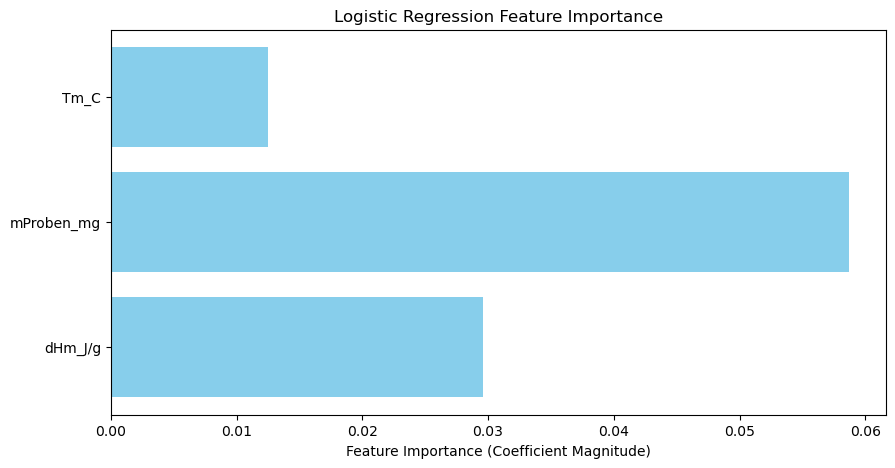

In [9]:
# Koeffizienten als Feature Importances verwenden
importances_log_reg = np.abs(log_reg.coef_[0])  # absolute Werte der Koeffizienten nehmen

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_log_reg, color="skyblue")
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Logistic Regression Feature Importance")
plt.show()

## 2. Random Forest Classifier

In [11]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest * 100:.2f}%")

Random Forest Accuracy: 87.27%


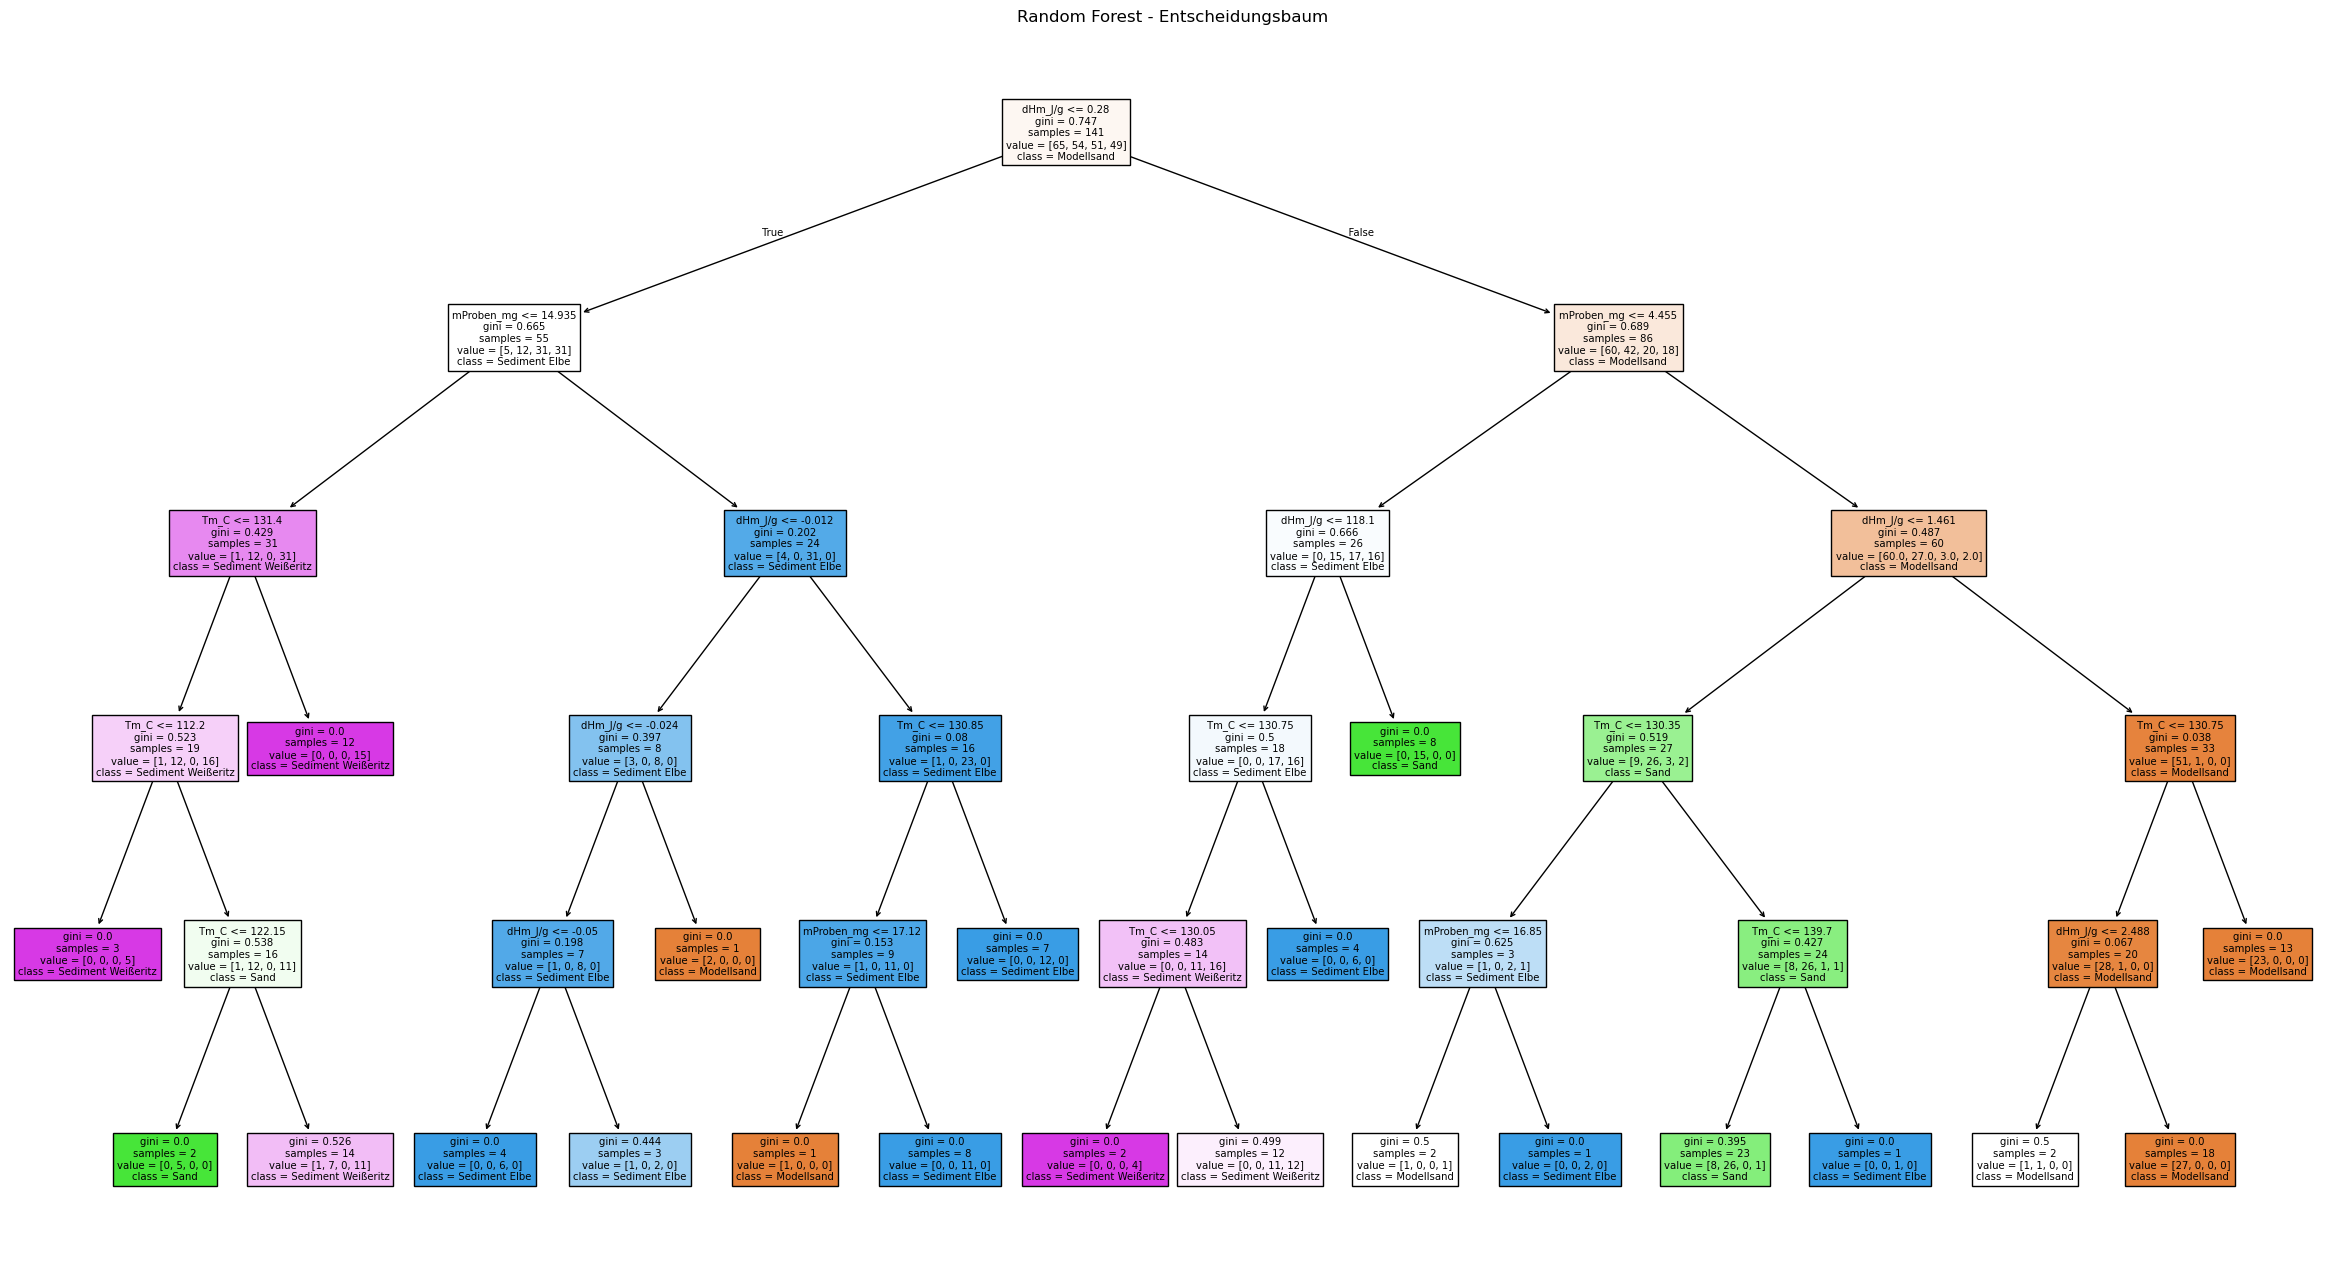

In [12]:
random_tree = random_forest.estimators_[0]  # Den ersten Baum im Wald auswählen
plt.figure(figsize=(30, 16))
plot_tree(random_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Random Forest - Entscheidungsbaum")
plt.show()

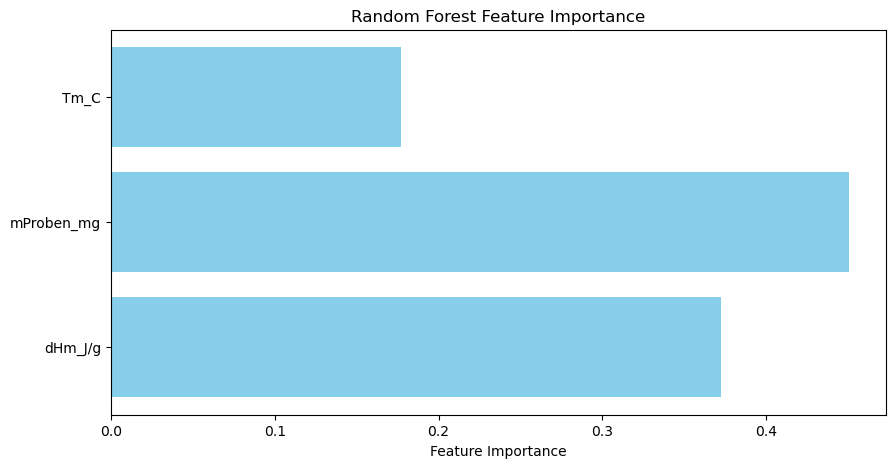

In [13]:
# Feature Importances abrufen
importances_rf = random_forest.feature_importances_

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_rf, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

## 3. Gradient Boosting Classifier

In [15]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Accuracy: {accuracy_gradient_boosting * 100:.2f}%")

Gradient Boosting Accuracy: 87.27%


In [16]:
# Visualisierung eines einzelnen Entscheidungsbaums aus Gradient Boosting
#gradient_tree = gradient_boosting.estimators_[0, 0]  # Den ersten Baum im ersten Schritt auswählen
#plt.figure(figsize=(20, 10))
#plot_tree(gradient_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
#plt.title("Gradient Boosting - Entscheidungsbaum")
#plt.show()

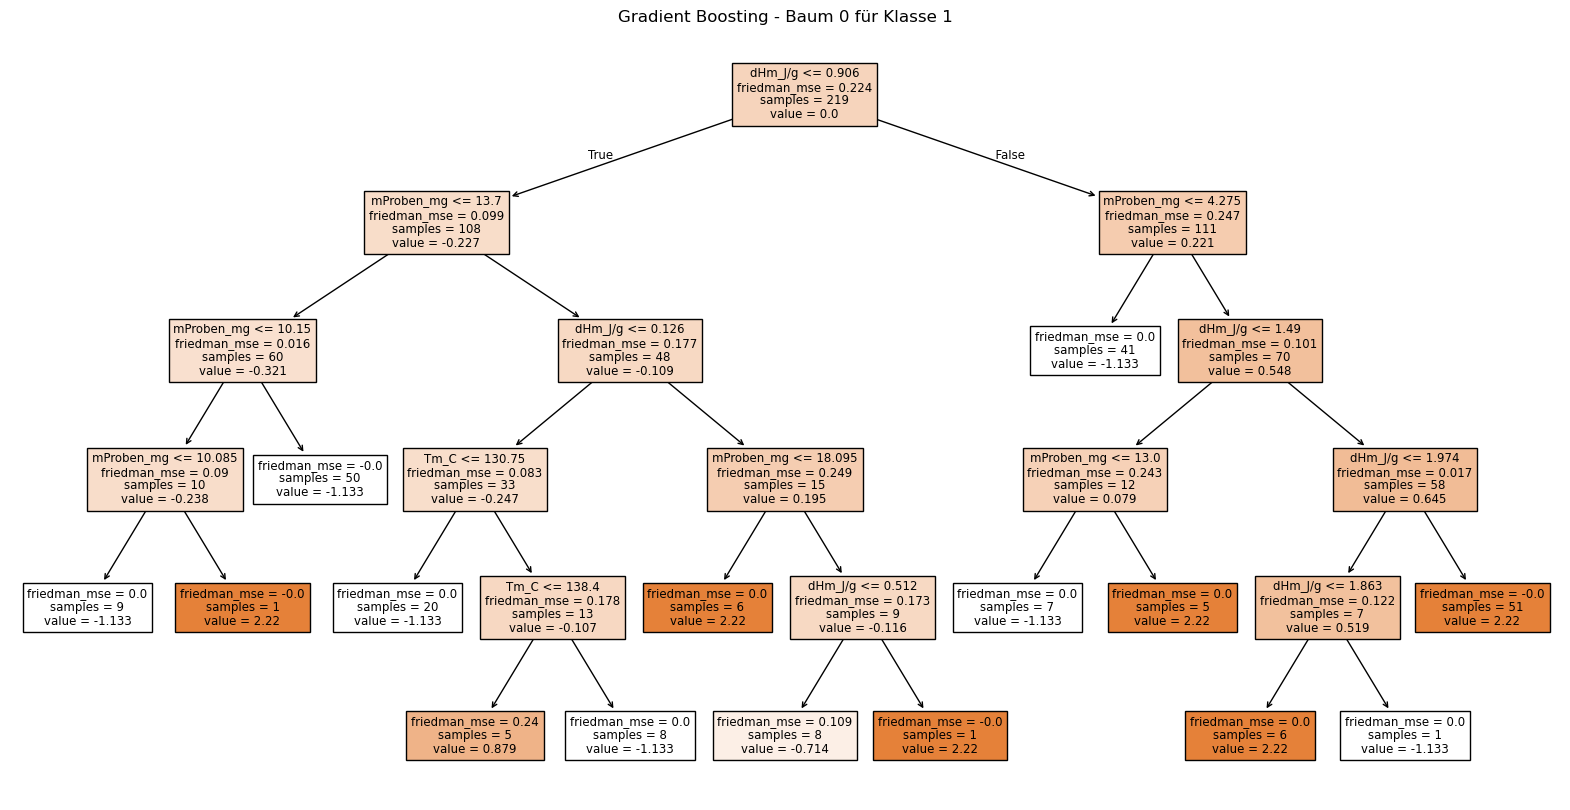

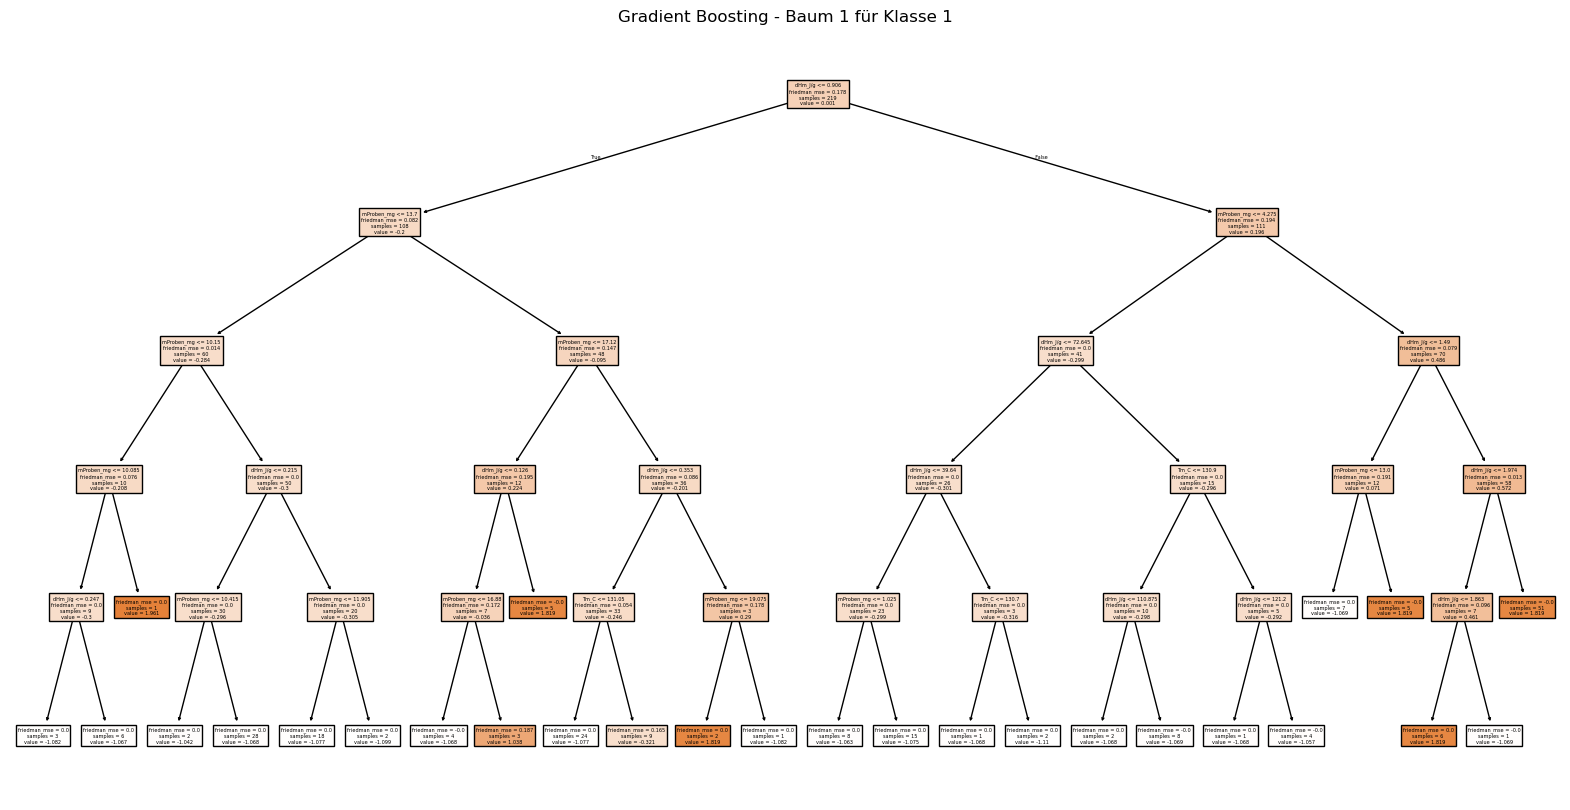

In [17]:
# Visualisierung der zwei ersten Bäume für Klasse 0 im Gradient Boosting Ensemble
for i in range(2):  # Anzahl der Bäume, die du visualisieren möchtest
    plt.figure(figsize=(20, 10))
    plot_tree(gradient_boosting.estimators_[i, 0], feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
    plt.title(f"Gradient Boosting - Baum {i} für Klasse 1")
    plt.show()

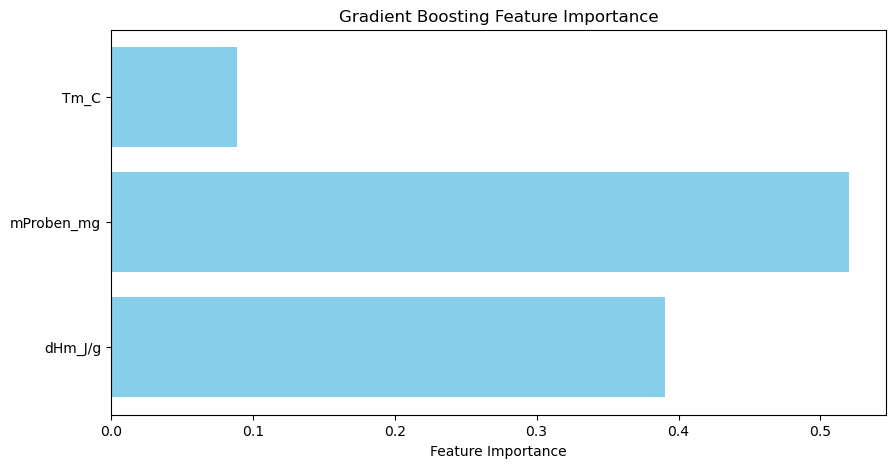

In [18]:
importances = gradient_boosting.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

## 4. XGBoost Classifier

In [20]:
xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"XGBoost Accuracy: {accuracy_xgboost * 100:.2f}%")

XGBoost Accuracy: 83.64%


<Figure size 4000x2000 with 0 Axes>

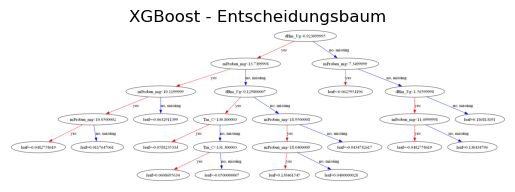

In [21]:
# Visualisierung eines einzelnen Entscheidungsbaums aus XGBoost
plt.figure(figsize=(40, 20))
xgb.plot_tree(xgboost_model, num_trees=0)  # Den ersten Baum von XGBoost auswählen
plt.title("XGBoost - Entscheidungsbaum")
plt.savefig('01_Matrix_xgboost_decision_tree.png', dpi=600)
plt.show()

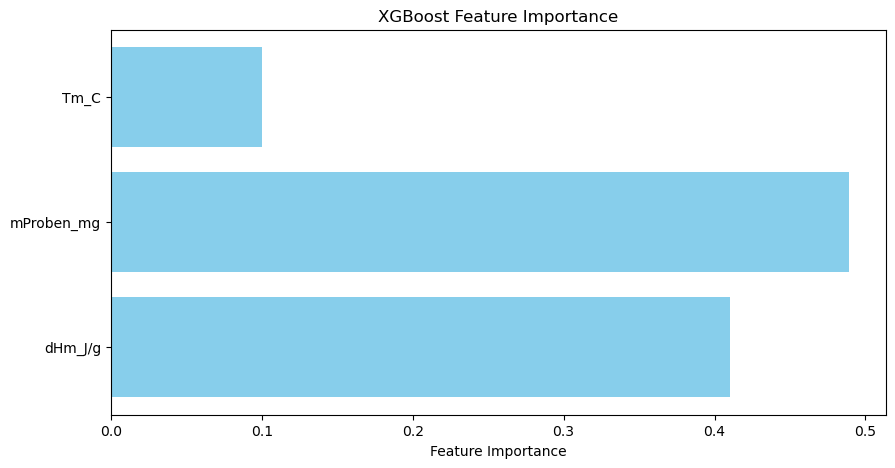

In [22]:
# Feature Importances abrufen
importances_xgboost = xgboost_model.feature_importances_

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_xgboost, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

## 5. K-Nearest Neighbors (KNN)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%")

K-Nearest Neighbors Accuracy: 89.09%


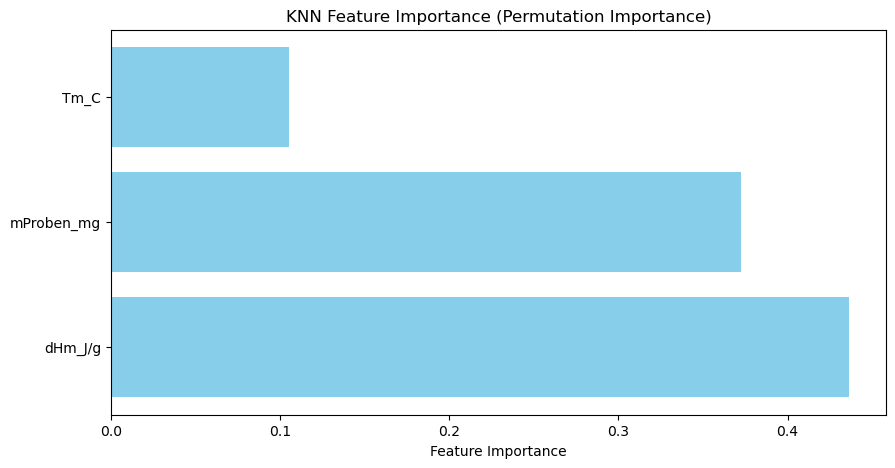

In [25]:
from sklearn.inspection import permutation_importance

# Permutation Importance für KNN
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Feature Importance extrahieren
importances_knn = result.importances_mean

# Feature Importance visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_knn, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("KNN Feature Importance (Permutation Importance)")
plt.show()


## Zusammenfassung der Ergebnisse in einem DataFrame

In [27]:
# Zusammenfassung der Ergebnisse in einem DataFrame
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_log_reg, accuracy_random_forest, accuracy_gradient_boosting, accuracy_xgboost, accuracy_knn]
})

# Sortiere den DataFrame nach Accuracy in absteigender Reihenfolge
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
accuracy_df

,Model,Accuracy
0,K-Nearest Neighbors,0.890909
1,Random Forest,0.872727
2,Gradient Boosting,0.872727
3,XGBoost,0.836364
4,Logistic Regression,0.636364
